In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.metrics import RocCurveDisplay

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


businesses_df = pd.read_csv('./guaynabo_businesses_100.csv')


businesses_df = businesses_df.drop('website', axis=1)


columns_to_encode = ['hire_rate', 'town', 'type', 'positive_value_1', 'positive_value_2', 'positive_value_3', 
                     'negative_value_1', 'negative_value_2', 'negative_value_3']
businesses_df = businesses_df[columns_to_encode]


label_encoder = LabelEncoder()


for column in columns_to_encode:
    businesses_df[column] = label_encoder.fit_transform(businesses_df[column])


vectorizer = CountVectorizer()
features_vec = vectorizer.fit_transform(businesses_df.astype(str).apply(lambda x: ' '.join(x), axis=1))


features_df = pd.DataFrame(features_vec.toarray(), columns=vectorizer.get_feature_names_out())


targets = businesses_df['hire_rate']

xtr, xte, ytr, yte = train_test_split(features_df, targets, train_size=0.85, stratify=targets, random_state=42)




In [3]:
knn = KNeighborsClassifier(n_neighbors=6, n_jobs=-1)
knn.fit(xtr, ytr)
knn.score(xtr, ytr)

0.4470588235294118

In [4]:
dtc = DecisionTreeClassifier(max_depth=6, criterion='gini', min_samples_split=4, random_state=42)
dtc.fit(xtr,ytr)
print(dtc.score(xtr,ytr))
print(dtc.score(xte,yte))

0.6588235294117647
0.3333333333333333


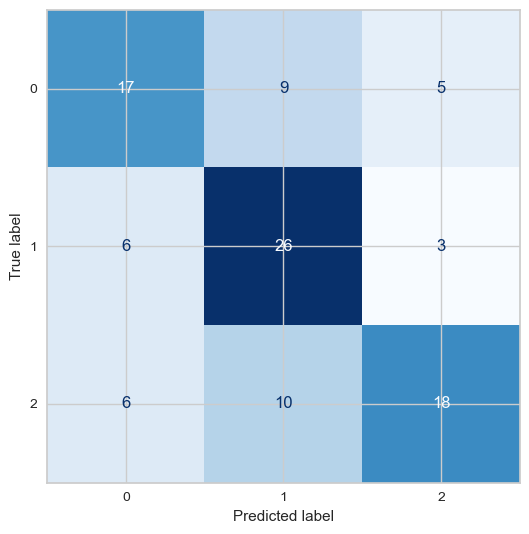

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay

f, ax = plt.subplots(1, 1, figsize=(5.5, 5.5))
ConfusionMatrixDisplay.from_estimator(dtc,
                      features_df,
                      targets,
                      cmap=plt.cm.Blues,
                      ##display_labels=['not defaulted', 'defaulted'],
                      colorbar=False,  # this argument only works with sklearn version 0.24 and up
                      ax=ax)

plt.tight_layout()

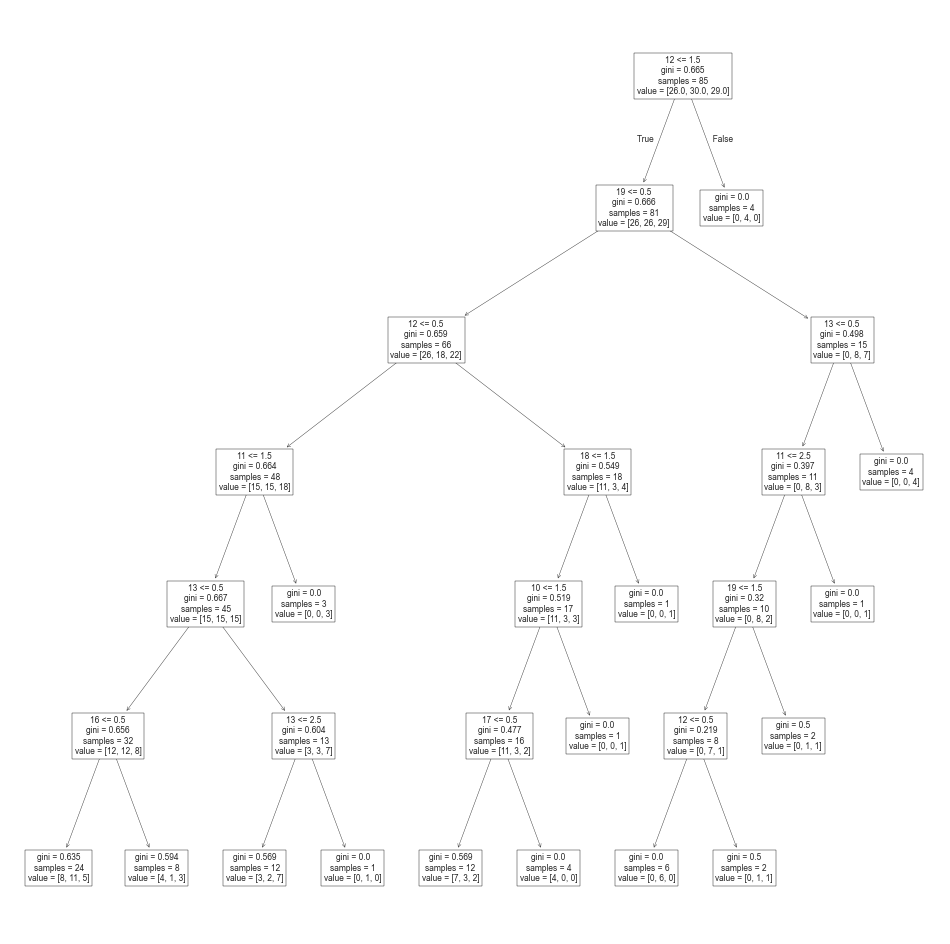

In [6]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12, 12))
_ = plot_tree(dtc, feature_names=features_df.columns)

In [13]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(ytr, dtc.predict(xtr))

0.48570832464010016

In [15]:
import pickle

with open('matching_companies.pkl', 'wb') as file:
    pickle.dump(dtc, file)
